# Optimization notes

This file contains notes about partical derivatives, gradients, gradient descent, backpropagation.

In order to **minimize the loss function**, one must perform `gradient descent` to determine whether certain parameters are decreasing loss or not.

----

# The Impact of a Parameter on the output

The following cells contains examples showing what is meant by the "impact" a parameter has on a function's output

[0 1 2 3 4]
[0 2 4 6 8]


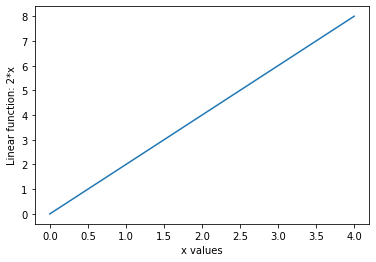

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style()


def f(x):
    return 2*x

# create an array with values of range 0-4
x = np.arange(5)

# function output for each value in x
y = f(x)

print(x,y,sep="\n")

plt.plot(x,y)
plt.xlabel("x values")
plt.ylabel("Linear function: 2*x", )
plt.show()

## The Slope

In order to find the **impact a parameter has on a function**, one must take the `slope` of the function (a.k.a. the line the function forms)

The `slope` is the **change in y** divided by the **change in x** (`Rise over run`):

<font size="5">$\frac{Change \;in \; y}{Change \; in \; x} = \frac{\Delta y}{\Delta x}$</font>

To `calculate the slope`, we must take any two points on our function's line and **subtract them**:

$p_1 = [0,0]$\
$p_2 = [1,2]$

$\Delta x = p_{2x} - p_{1x} = 1 - 0 = 1$\
$\Delta y = p_{2y} - p_{1y} = 2 - 0 = 2$

<font size="5">$slope = \frac{\Delta y}{\Delta x} = \frac{2}{1}$ = 2 </font>

In [2]:

print(f"Values:\nx:{x}\ny:{y}")

# calculate the slop using two random points from the line(function)
delta_y = y[1] - y[2]
delta_x = x[1] - x[2]

slope = delta_y / delta_x
print(f"Slope: {slope}")

# define a slope function for convenience


Values:
x:[0 1 2 3 4]
y:[0 2 4 6 8]
Slope: 2.0


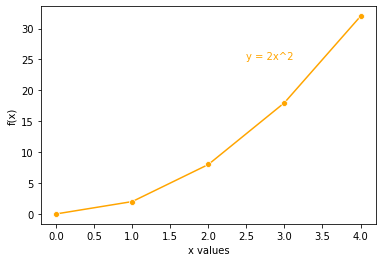

In [3]:
def f(x):
    return 2*x**2

y = f(x)

sns.lineplot(x=x,y=y, color="orange", marker="o")
plt.text(2.5,25, "y = 2x^2", color="orange")
plt.ylabel("f(x)")
plt.xlabel("x values")
plt.show()

The `parabola` above is non-linear. Can we still take it's slope?

Well, yes. However, the `slope` will change **depending on which points we choose**

Values:
x:[0 1 2 3 4]
y:[ 0  2  8 18 32]
~~~~~~~~~~
Slope: 2.0
Slope: 10.0


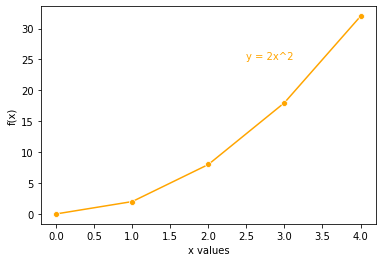

In [4]:
print(f"Values:\nx:{x}\ny:{y}\n{'~'*10}")

# calculate the slop using two random points from the line(function)
delta_y = y[1] - y[0]
delta_x = x[1] - x[0]

slope1 = delta_y / delta_x
print(f"Slope: {slope1}")

delta_y = y[3] - y[2]
delta_x = x[3] - x[2]

slope2 = delta_y / delta_x
print(f"Slope: {slope2}")


sns.lineplot(x=x,y=y, color="orange", marker="o")
plt.text(2.5,25, "y = 2x^2", color="orange")
plt.ylabel("f(x)")
plt.xlabel("x values")
plt.show()


From the plot above, we can see that the slope is constantly changing. So how do we measure the impact that $x$ has on $y$ for a `nonlinear` function?

## Derivatives

According to **calculus**, we must measure the slope of the `tangent line` at $x$ (for a specific input value), which gives us the `instantaneous slope` (slope at this point), which is the ~**`derivative`**~. So:

- **Slope of tangent line** == **instantaneous slope** == `derivative`

The `tangent line` is calculated by **drawing a line between two points** `"infinitely close"` on a curve, but the curve has to be *differentiable at the derivation point*.

In other words, the curve has to be **continuous and smooth** and because this is a curve, **there is no single slope**. 

To give an immediate example, we can approcimate a `derivative` of the function at $x$ by using this point and another one also taken at $x$, but with a \
**very small delta added to it**, such as $0.0001$. This number is a common choice because it does **not introduce too large an error**.

Since we can't choose an *infinitely* small number in code, we choose a `sufficiently small` one like $0.0001$


In [5]:
p2_delta = 0.0001

x1 = 1
x2 = x1 + p2_delta

y1 = f(x1) # result at the derivation point
y2 = f(x2) # result at the other, close point

approximate_derivative = (y2-y1) / (x2-x1)

print(approximate_derivative)

4.0001999999987845


The `derivative` of $2x^2$ at $x=1$ is exactly 4, and the approximation above came very close, with the only difference being in how we calculated the tangent.

Concerning the delta:
- We can't choose an **extremely small value** because of `floating-point precision errors` 
- But the value needs to be **large enough** to avoid `rounding errors`
- $0.0001$ is a common choice (**is this the learning rate in NNs???**)

`Numerical differentiation` is the process of finding the numerical value of a derivative of a given function at a given point.
- (i.e. calculating the **slope of the tangent line** using two *infinitely* close points)

The **closer the two points are** for calculating the **slope of the tangent line**, the `more correct` the tangent line appears to be.

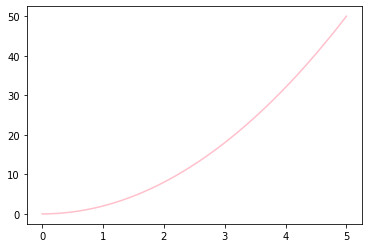

In [9]:
def f(x):
    return 2*x**2

x = np.arange(0,5,0.0001)
y = f(x)

sns.lineplot(x=x, y=y, color="pink")
plt.show()